# Support Vector Machine - Visualization (Linear Kernel)

## Step 1 - Import Libraries

In [29]:
# Import numpy, pandas, matplotlib, seaborn, SVC, and confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Step 2 - EDA

### 2.1 - Import data

In [30]:
# read csv
df = pd.read_csv('./data/data.csv')

In [31]:
# review data

### 2.2 - Data Visualization

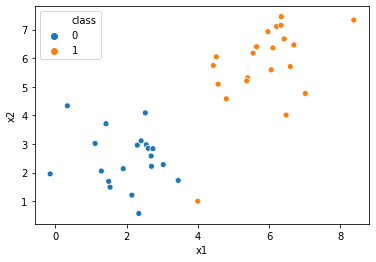

In [32]:
# plot data
sns.scatterplot(data=df, x='x1',y='x2', hue='class');

## Step 3 - Model & Model Evaluation

### 3.1 - Fit, Run, Predit & Evaluation

In [33]:
# X & y
X = df[['x1', 'x2']]
y = df['class']

In [34]:
# instantiate & fit svc model
# using kernel = 'linear'
# C = 1.0 (the default)
svc = SVC(kernel='linear', C=1.0)
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
# model y_pred using X
y_pred = svc.predict(X)

In [36]:
# evaluate the model using confusion matrix
confusion_matrix(y, y_pred)

array([[20,  0],
       [ 1, 20]])

### 3.2 Plot the Decision Boundary

In [37]:
# Check the coefficient of the features
svc.coef_

array([[0.94195034, 0.19433212]])

In [38]:
# Check the interception of the features
svc.intercept_

array([-4.29601899])

In [39]:
# extract values for beta_1, beta_2, and the intercept
beta_1 = svc.coef_[0][0]
beta_2 = svc.coef_[0][1]
intercept = svc.intercept_[0]

# check by printing out the values
print(beta_1, beta_2, intercept)

0.941950343460682 0.19433212016938572 -4.296018990142406


In [40]:
# Write out the equation of decision boundary


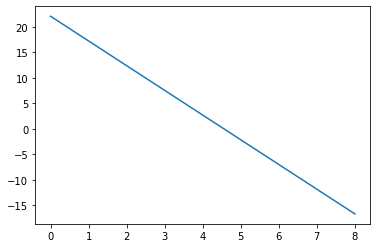

In [41]:
x1 = np.linspace(0, 8, 50)
# calculate x2 using the equation above
x2 = (-intercept - beta_1*x1)/beta_2
plt.plot(x1, x2);

In [42]:
# Locate the support vectors
sv = pd.DataFrame(svc.support_vectors_, columns=['x1','x2'])
print(sv)

         x1        x2
0  3.449867  1.722559
1  3.029665  2.277223
2  4.436518  5.744879
3  4.572551  5.090340
4  4.000000  1.000000


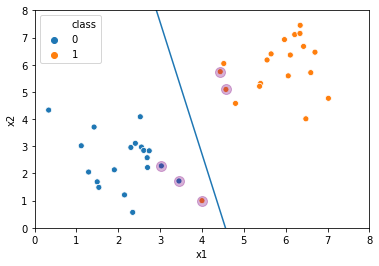

In [43]:
sns.scatterplot(data=df, x='x1',y='x2',hue='class');
plt.scatter(x=sv['x1'], y=sv['x2'],marker='o', s=100, color='purple', alpha=0.3)
plt.plot(x1, x2)
plt.xlim(0, 8)
plt.ylim(0, 8);

### Let's put everything together

In [44]:
def svm_model(df, C):
    # define X & y
    X = df[['x1','x2']]
    y = df['class']
    
    # run, fit, predict
    svc = SVC(kernel='linear', C = C)
    svc.fit(X, y)
    y_pred = svc.predict(X)
    sv = pd.DataFrame(svc.support_vectors_, columns=['x1','x2'])
    print(confusion_matrix(y, y_pred))
    
    # construct the decision boundary
    beta_1 = svc.coef_[0][0]
    beta_2 = svc.coef_[0][1]
    intercept = svc.intercept_
    
    x1 = np.linspace(0, 8, 50)
    x2 = (-intercept - beta_1*x1)/beta_2
    
    # plot the data, decision boundary, and support vectors
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.scatterplot(data=df, x='x1',y='x2',hue='class', ax=ax) 
    ax.scatter(x=sv['x1'], y=sv['x2'],marker='o', s=100, color='purple', alpha=0.3)
    ax.plot(x1, x2)
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8);

[[20  0]
 [ 1 20]]


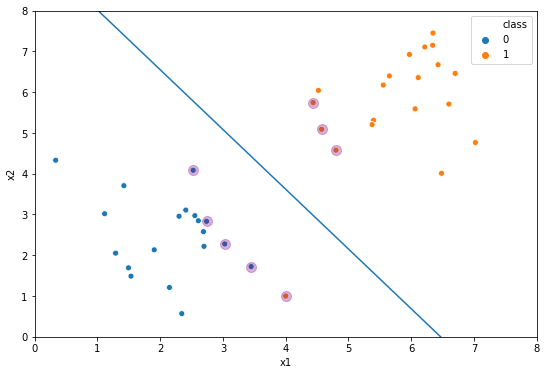

In [47]:
svm_model(df, 0.1)